# 1. Functions

## 1.1 Function to plot leakage

In [47]:
import matplotlib.pyplot as plt
def plot_leakage(ax, x, leakage, xlabel='X-axis'):
    """
    Plot only leakage on a single axis.

    Parameters:
    ax (matplotlib.axes.Axes): The axis to plot on.
    x (array-like): Data for the x-axis.
    leakage (array-like): Data for leakage on the y-axis.
    xlabel (str): Label for the x-axis.
    """
    # Plot leakage on the primary y-axis
    color = 'tab:red'
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Leakage', color=color)
    ax.plot(x, leakage, 'o--', color=color, label='Leakage')
    ax.tick_params(axis='y', labelcolor=color)
    ax.legend(loc='upper left')


## 1.2 Function to generate list of point to plot

In [48]:
def generate_points_within_range(start, end):
    step = (end - start) / 4
    points = [start + i * step for i in range(5)]
    return points

## 1.3 Function to extract corresponsing leakage

In [49]:
import pandas as pd
import numpy as np

def nearest_values_average(df, numbers, column_name, target_column):
    outputs = []
    for number in numbers:
        nearest_index = (df[column_name] - number).abs().idxmin()  # Find index of nearest value
        nearest_value = df.loc[nearest_index, column_name]  # Get the nearest value
        nearest_indices = df.index[df[column_name] == nearest_value]  # Get indices of all occurrences of nearest value
        average_value = df.loc[nearest_indices, target_column].mean()  # Calculate average of corresponding values in target column
        outputs.append(average_value)
    return outputs


# 2. Generating the range list 

In [50]:
temp_range = [-55,125]
temp_list = generate_points_within_range(temp_range[0],temp_range[1])

In [51]:
pvdd_range = [0.82,0.98]
pvdd_list = generate_points_within_range(pvdd_range[0],pvdd_range[1])

In [52]:
parameters = {
    'toxe': 6.5e-010,
    'toxm': 6.5e-010,
    'toxref': 6.7e-010,
    'toxp_par': 4e-010,
    'xj': 7.2e-009,
    'ndep': 1.2e+019
}

# Ranges for each parameter
ranges = {
    'toxe': (0.9 * parameters['toxe'], 1.1 * parameters['toxe']),
    'toxm': (0.9 * parameters['toxm'], 1.1 * parameters['toxm']),
    'toxref': (0.9 * parameters['toxref'], 1.1 * parameters['toxref']),
    'toxp_par': (0.9 * parameters['toxp_par'], 1.1 * parameters['toxp_par']),
    'xj': (0.9 * parameters['xj'], 1.1 * parameters['xj']),
    'ndep': (0.9 * parameters['ndep'], 1.1 * parameters['ndep'])
}

# Generate points within the specified ranges for each parameter
toxe_list = generate_points_within_range(*ranges['toxe'])
toxm_list = generate_points_within_range(*ranges['toxm'])
toxref_list = generate_points_within_range(*ranges['toxref'])
toxp_par_list = generate_points_within_range(*ranges['toxp_par'])
xj_list = generate_points_within_range(*ranges['xj'])
ndep_list = generate_points_within_range(*ranges['ndep'])

# 3. INVERTER

Loading the File path

In [7]:
file_path = "INVERTER_leakage.csv"  # Provide the path to your CSV file
df_inverter_leakage = pd.read_csv(file_path)

## 3.1 Temparature

In [8]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_inverter_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)


[1.72436717448438e-07, 1.7706901299426014e-07, 1.6752174101694613e-07, 4.521907159622678e-07, 6.963827777500264e-07]


## 3.2 Pvdd

In [9]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_inverter_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)


[3.1859782088465184e-07, 3.023307849098677e-07, 3.91308548981442e-07, 3.91308548981442e-07, 3.91308548981442e-07]


## 3.3 toxe

In [10]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_inverter_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)


[1.403078190945645e-07, 1.0157996846471689e-07, 2.3963114488729746e-07, 3.686564352714766e-07, 1.9920275618914153e-07]


## 3.4 toxm

In [11]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_inverter_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[3.6162454369991534e-07, 3.2593843662907084e-07, 2.6520398322246893e-07, 1.4763846421031818e-07, 2.1620506880372908e-07]


## 3.5 toxref

In [12]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_inverter_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[2.6216231613556677e-07, 3.270372080141734e-07, 1.9288220169424221e-07, 2.730126914742373e-07, 5.44243474829525e-07]


## 3.6 toxp

In [13]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_inverter_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[4.625420050558413e-07, 1.6898768489837817e-07, 6.134034092305717e-07, 1.9642359686379181e-07, 5.17877153145569e-07]


## 3.7 xj

In [14]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_inverter_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)



[1.464275262388506e-07, 4.1981705429223565e-07, 2.1364140844789892e-07, 1.8556091412147073e-07, 3.957708900656395e-07]


## 3.8 ndep

In [15]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_inverter_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[4.943911854231098e-07, 3.279722515972807e-07, 4.138569826035619e-07, 2.462221868874919e-07, 2.920091410421124e-07]


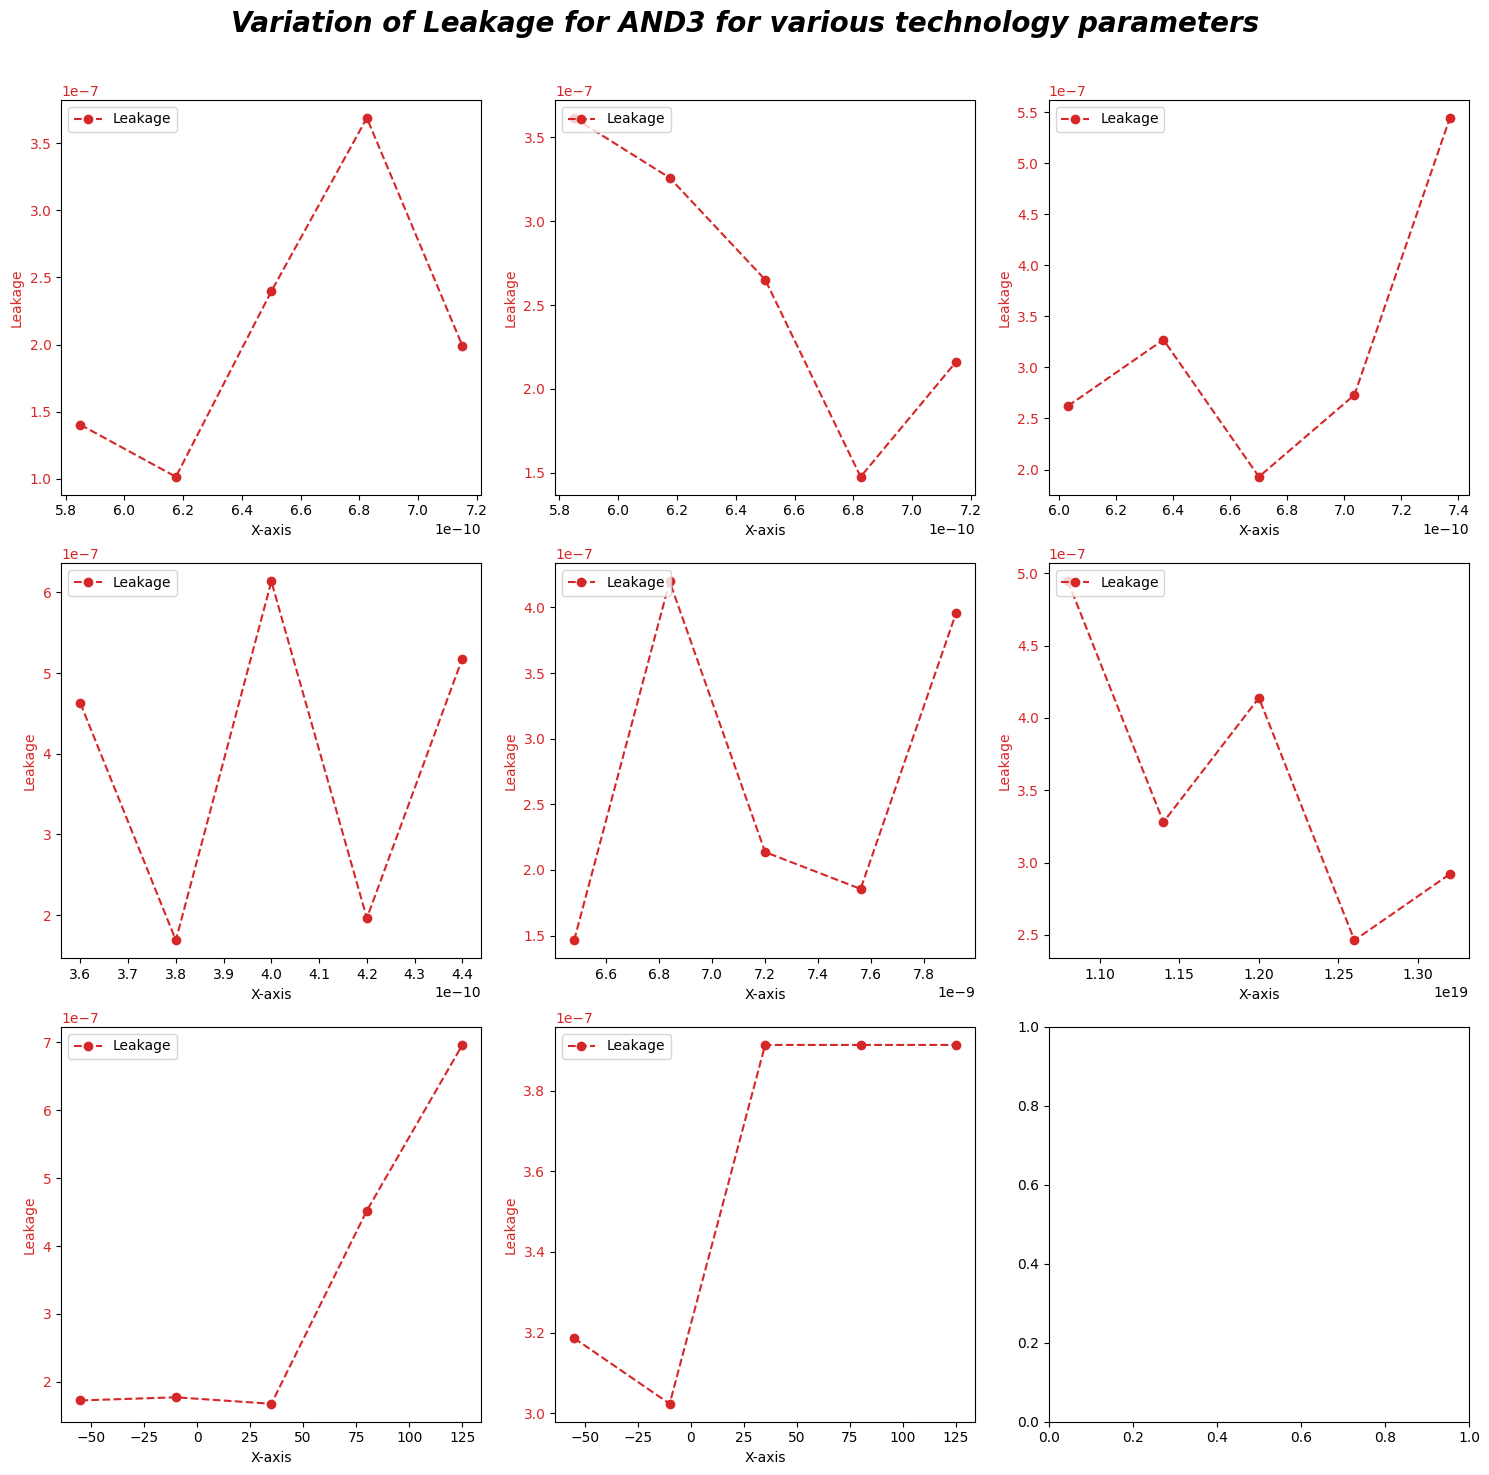

In [16]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()


# 4. AND2

Loading the File path

In [17]:
file_path = "AND_2_leakage.csv"  # Provide the path to your CSV file
df_and2_leakage = pd.read_csv(file_path)

## 4.1 Temparature

In [18]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_and2_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)


[8.315755877783446e-07, 8.386973433632421e-07, 7.350296325409484e-07, 1.8400903587569785e-06, 2.6542363547098927e-06]


## 4.2 Pvdd

In [19]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_and2_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)


[1.330715898843198e-06, 1.3003681411763984e-06, 1.6783449881055748e-06, 1.6783449881055748e-06, 1.6783449881055748e-06]


## 4.4 toxe

In [20]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_and2_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)



[6.322673823870938e-07, 4.955655827354112e-07, 1.1186093533245988e-06, 1.534050426627037e-06, 8.526753200472232e-07]


## 4.5 toxm

In [21]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_and2_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[1.4921166235123051e-06, 1.3938627722884185e-06, 1.0538803798217251e-06, 7.143538507901113e-07, 1.0434498544938215e-06]


## 4.6 toxref

In [22]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_and2_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[1.1919324618506535e-06, 1.3493007387970488e-06, 9.15275251367099e-07, 1.1906595847890618e-06, 2.087893900906983e-06]


## 4.7 toxp

In [23]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_and2_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[1.7141398006145885e-06, 8.020252979423536e-07, 2.2621153911881433e-06, 9.57873814600123e-07, 1.99255532949602e-06]


## 4.8 xj

In [24]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_and2_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)


[6.79633147485826e-07, 1.6292221762952113e-06, 1.0103887256568395e-06, 9.06357203242125e-07, 1.5629097736763008e-06]


## 4.9 ndep

In [25]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_and2_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[1.9892203877169066e-06, 1.3697141192244234e-06, 1.6556480634059205e-06, 1.0638536144267794e-06, 1.1337874584129714e-06]


## 4.10 Plotting all plots

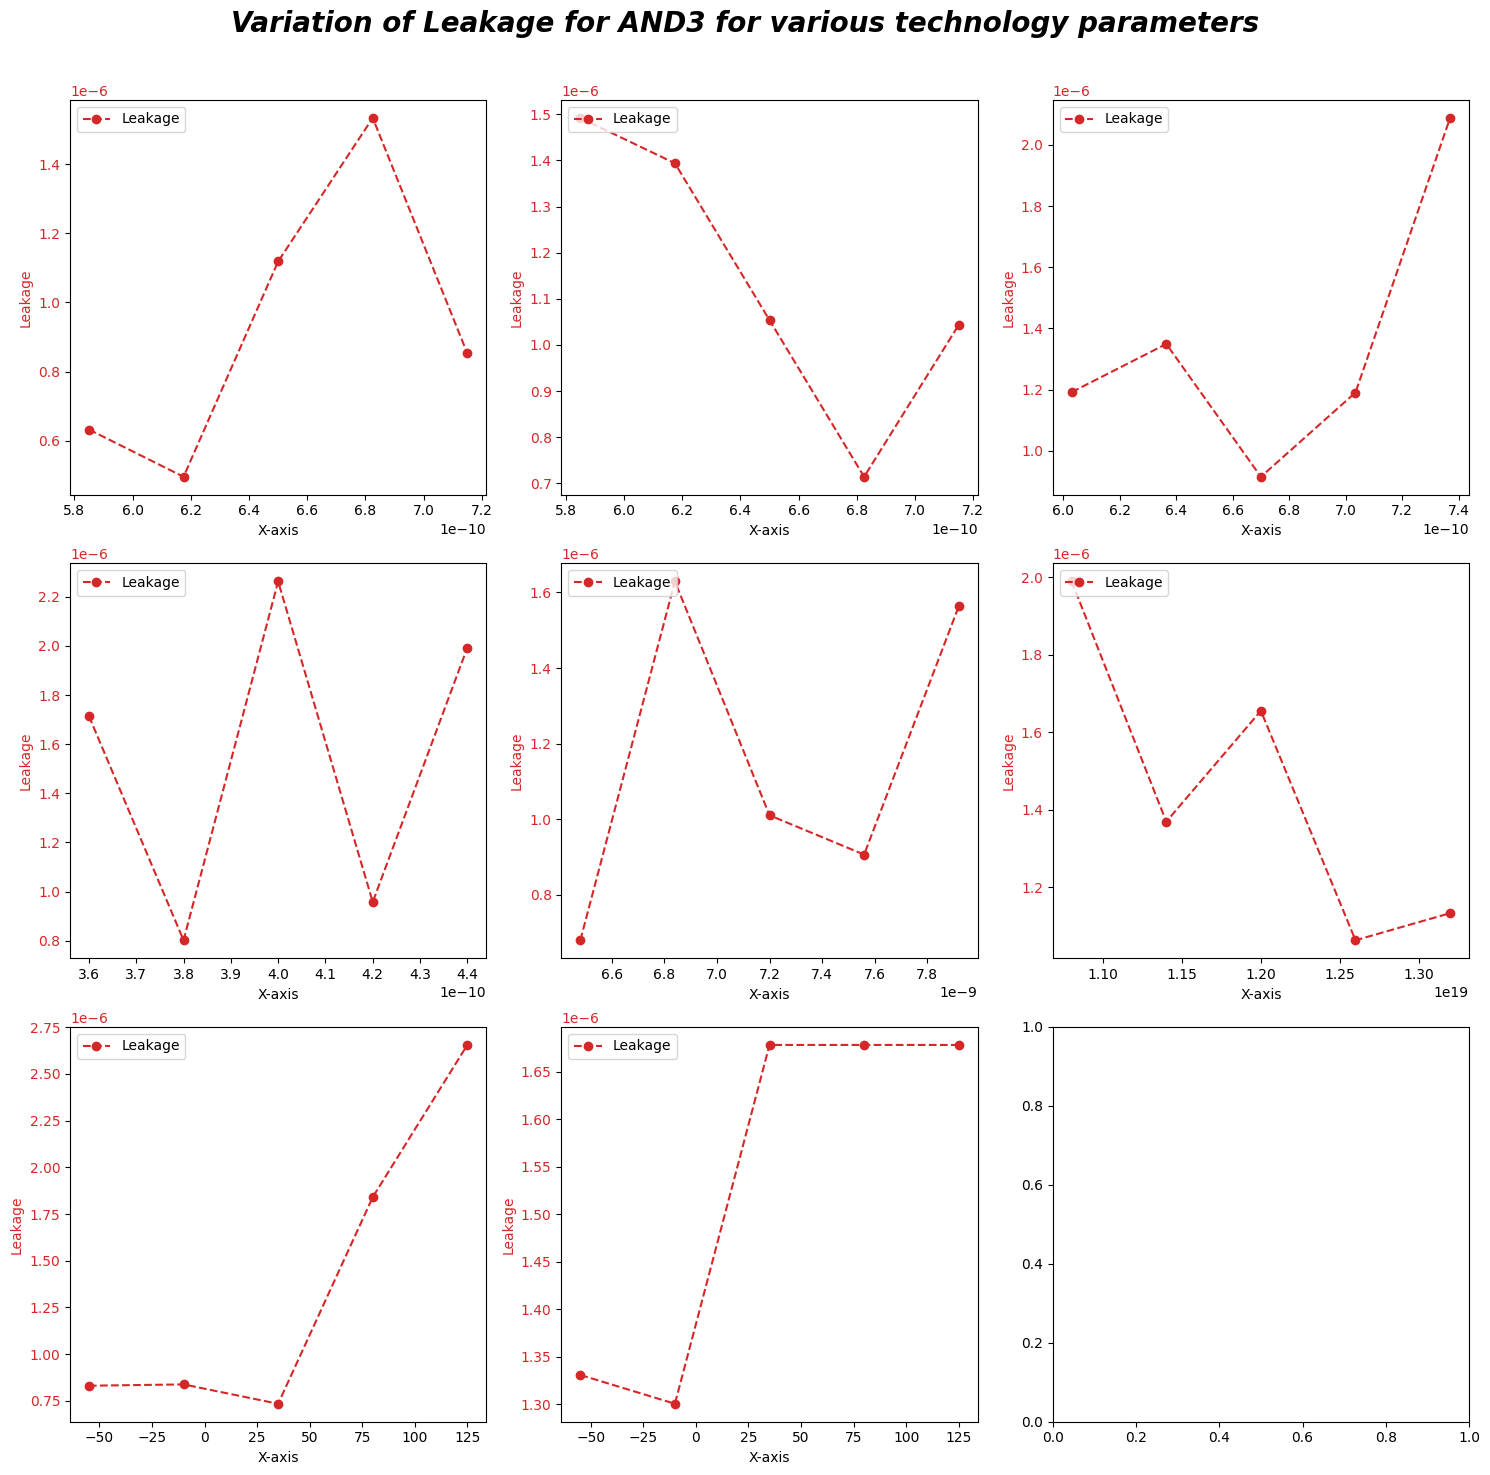

In [26]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()


# 5. AND3

Loading the File path

In [27]:
file_path = "AND_3_leakage.csv"  # Provide the path to your CSV file
df_and3_leakage = pd.read_csv(file_path)

## 5.1 Temparature

In [28]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_and3_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)



[1.1069702414556481e-06, 1.109948844245594e-06, 9.473255807866093e-07, 2.293943377217472e-06, 3.172104316632872e-06]


## 5.2 Pvdd

In [29]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_and3_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)



[1.6739864838047827e-06, 1.658559119211439e-06, 2.143708660659393e-06, 2.143708660659393e-06, 2.143708660659393e-06]


## 5.4 toxe

In [30]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_and3_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)



[8.251919208511806e-07, 6.652597209866079e-07, 1.4734611594523954e-06, 1.9310131600564676e-06, 1.0841978981862947e-06]


## 5.5 toxm

In [31]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_and3_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[1.8634600382587928e-06, 1.7755120040731636e-06, 1.2922027581891538e-06, 9.53515189982493e-07, 1.3885376087038026e-06]


## 5.6 toxref

In [32]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_and3_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[1.5545911100881478e-06, 1.6872252776163056e-06, 1.2122093214009209e-06, 1.5279281143411677e-06, 2.5111434782824808e-06]


## 5.7 toxp

In [33]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_and3_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[2.0144849277148204e-06, 1.0627194076389817e-06, 2.6433584210278126e-06, 1.2775752171759127e-06, 2.4055165483957266e-06]


## 5.8 xj

In [34]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_and3_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)


[8.953896564294136e-07, 1.9858602603513643e-06, 1.335537293614474e-06, 1.2101510746821854e-06, 1.9132310910179677e-06]


## 5.9 ndep

In [35]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_and3_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[2.4626511910574193e-06, 1.7239944918285729e-06, 2.0416270761138967e-06, 1.360081289404007e-06, 1.3760963042583258e-06]


## 5.10 Plotting all plots

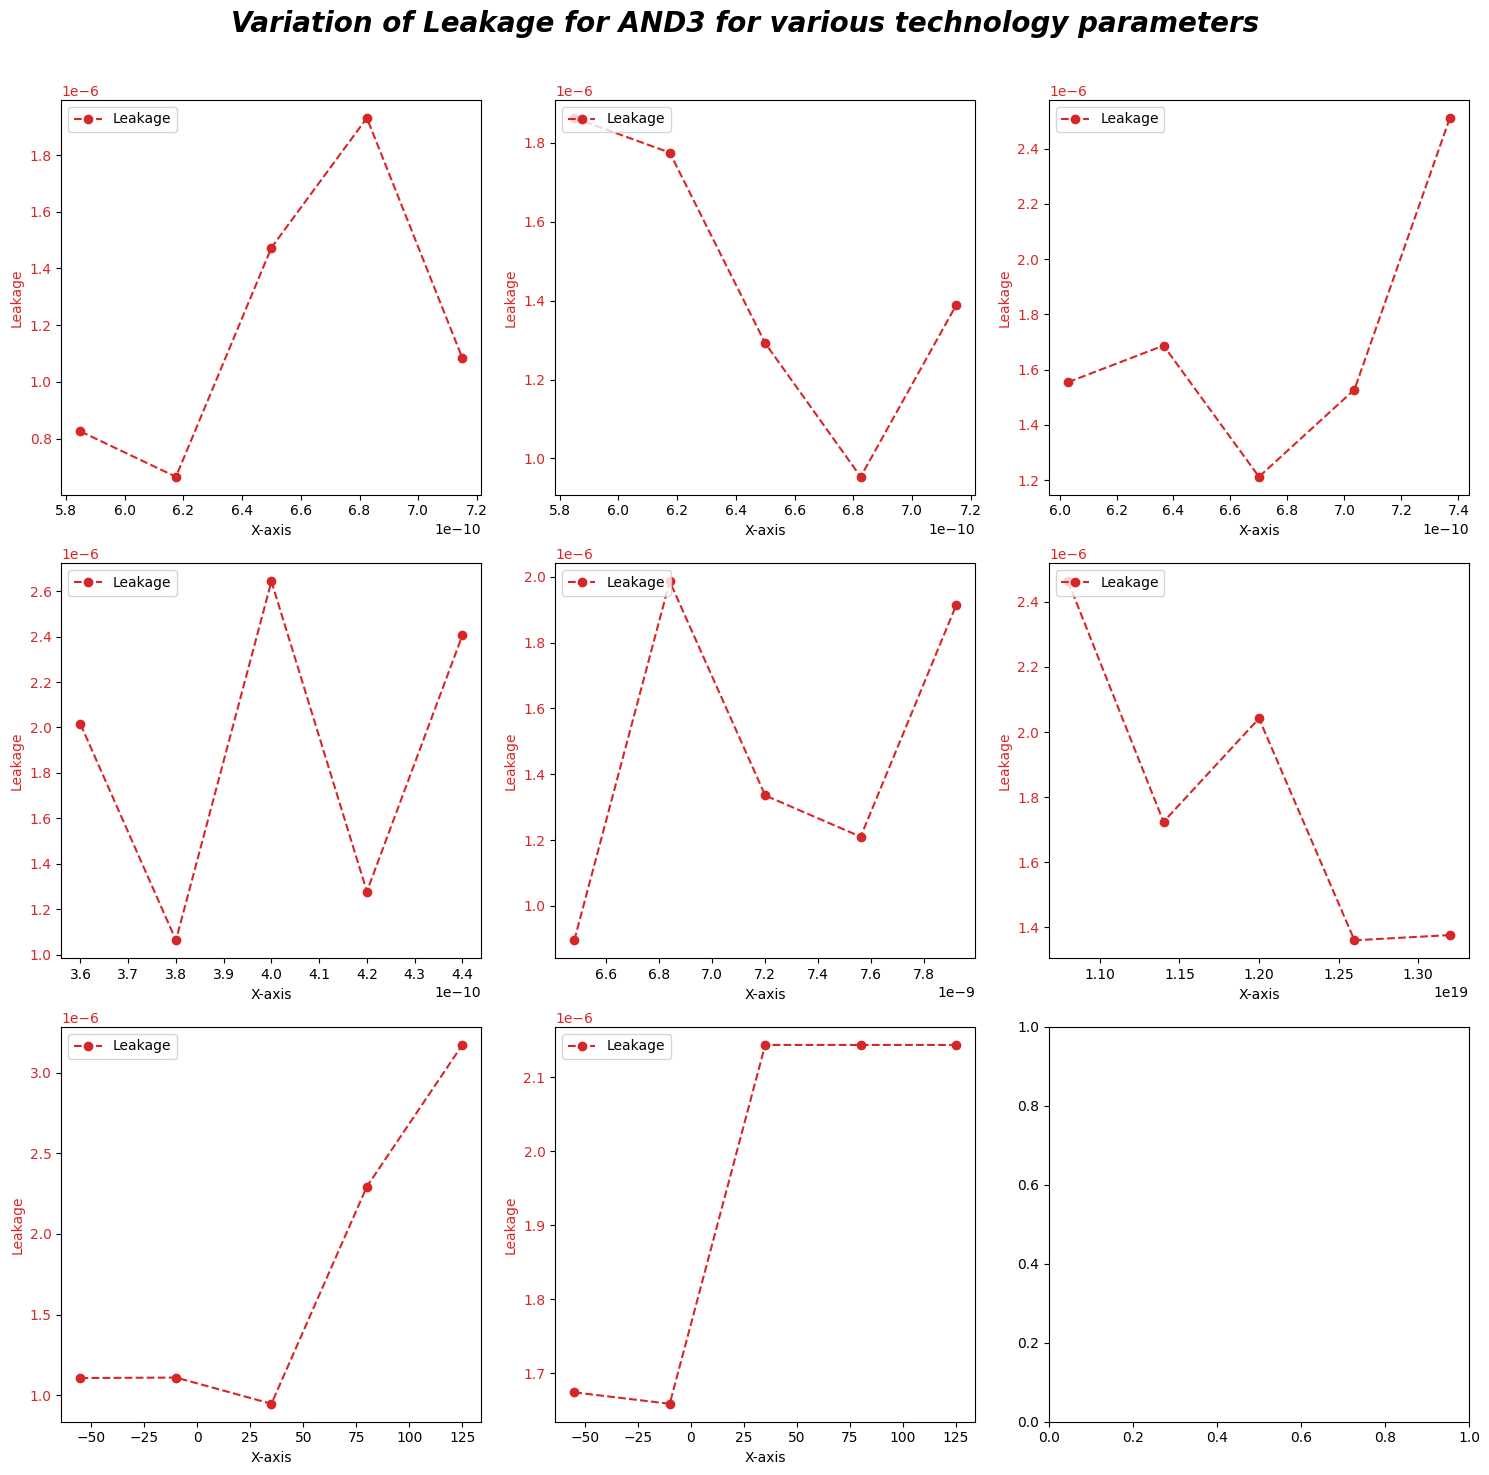

In [36]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()


# 6. OR2

Loading the File path

In [37]:
file_path = "OR_2_leakage.csv"  # Provide the path to your CSV file
df_or2_leakage = pd.read_csv(file_path)

## 6.1 Temparature

In [38]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_or2_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)


[7.102004698995323e-07, 8.633373298282388e-07, 7.232774194722775e-07, 2.293993777089246e-06, 3.5001345620194364e-06]


## 6.2 Pvdd

In [39]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_or2_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)


[1.6174072615365333e-06, 1.4970438329125859e-06, 1.643977824108629e-06, 1.643977824108629e-06, 1.643977824108629e-06]


## 6.4 toxe

In [40]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_or2_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)


[5.909900580412195e-07, 4.978586762176913e-07, 1.014835614454834e-06, 1.5634338329703595e-06, 1.0234186806603298e-06]


## 6.5 toxm

In [41]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_or2_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[1.861829604097764e-06, 1.339159923174128e-06, 1.3282059558700379e-06, 6.155965394467599e-07, 1.0412144731194551e-06]


## 6.6 toxref

In [42]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_or2_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[1.06313012147242e-06, 1.3326228142431486e-06, 7.996834038295862e-07, 1.1639121604112578e-06, 2.835233662009118e-06]


## 6.7 toxp

In [43]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_or2_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[2.2901537601464157e-06, 8.314935965534688e-07, 3.0274109772410655e-06, 8.05288709648765e-07, 2.5351341267417192e-06]


## 6.8 xj

In [44]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_or2_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)


[6.047854469449475e-07, 1.6106417806588521e-06, 1.0364120432520655e-06, 8.957640261372202e-07, 1.9894442626387516e-06]


## 6.9 ndep

In [45]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_or2_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[2.5147495286104447e-06, 1.3703014094966402e-06, 1.7460639621661455e-06, 1.0707744881842968e-06, 1.2541526172206076e-06]


## 6.10 Plotting all plots

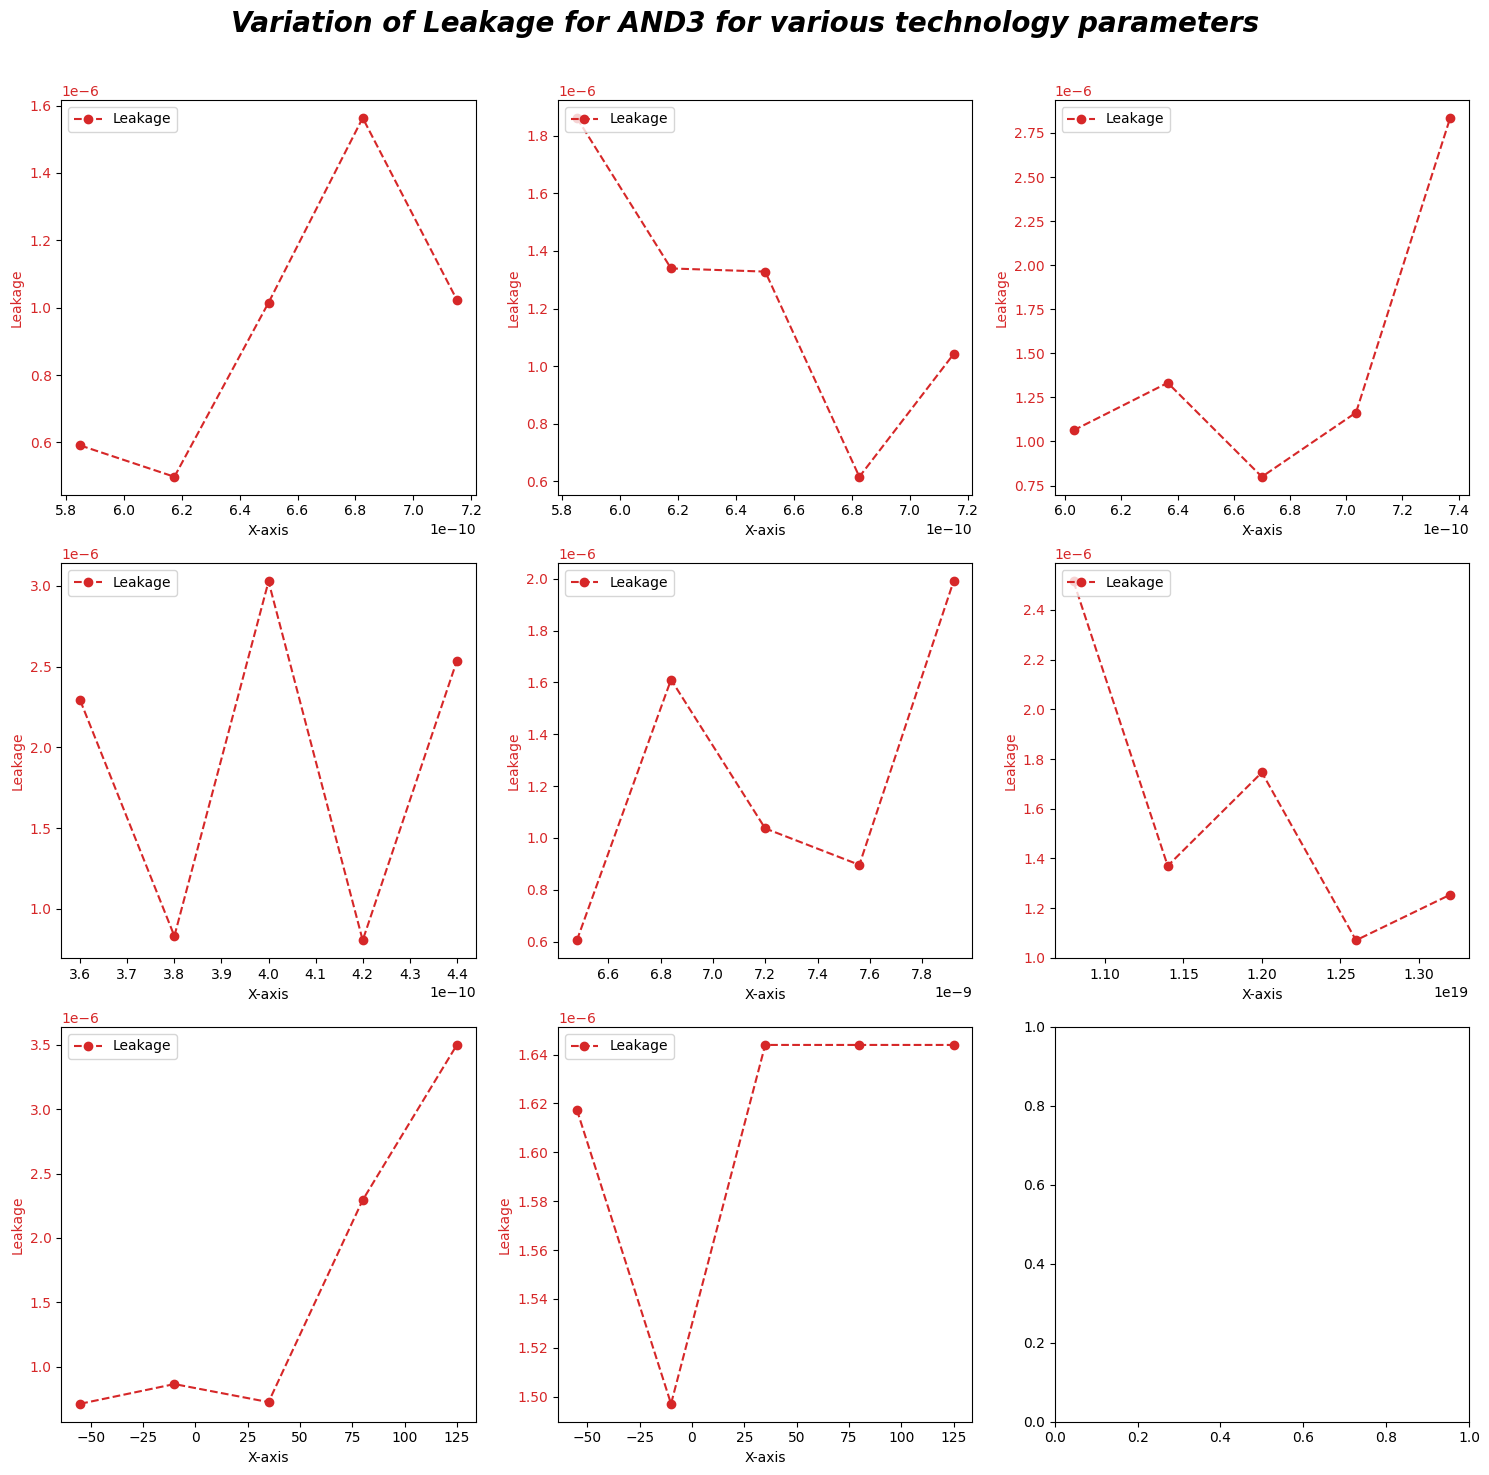

In [46]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()


# 7. XOR

Loading the File path

In [73]:
file_path = "XOR_leakage.csv"  # Provide the path to your CSV file
df_xor_leakage = pd.read_csv(file_path)

## 7.1 Temparature

In [54]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_xor_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)


[0.0001567190442822981, 0.00012902879410740407, 9.197619295811809e-05, 0.0001469132411204539, 0.00014182360061208146]


## 7.2 Pvdd

In [55]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_xor_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)


[0.0001242530747690736, 0.0001380785405003499, 0.00014646893362790924, 0.00014646893362790924, 0.00014646893362790924]


## 7.4 toxe

In [56]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_xor_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)


[0.0001077239303667287, 8.458380881703283e-05, 0.00012250428468807065, 0.00013298224614606755, 9.686717702113615e-05]


## 7.5 toxm

In [57]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_xor_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[0.00011696914234952683, 0.00015162213683710796, 0.00012023559054249867, 0.00011369522050964589, 0.00016638313839023724]


## 7.6 toxref

In [58]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_xor_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[0.00018016419407296258, 0.0001483424353499086, 0.00014129797616048388, 0.00011825493674533875, 0.00012522540955687864]


## 7.7 toxp

In [59]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_xor_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[0.00013028384652527723, 0.00011478757468836418, 0.0001435981797055677, 0.00014921324370844135, 0.0001595351216782778]


## 7.8 xj

In [60]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_xor_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)


[0.00013885822342205655, 0.0001872681968182787, 0.00015063048439833946, 0.000140962212632577, 0.00013722595359331002]


## 7.9 ndep

In [61]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_xor_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[0.00013970514143362193, 0.00013561785244190847, 0.00013729172745431342, 0.00011049028123822706, 0.00010808134138467451]


## 7.10 Plotting all plots

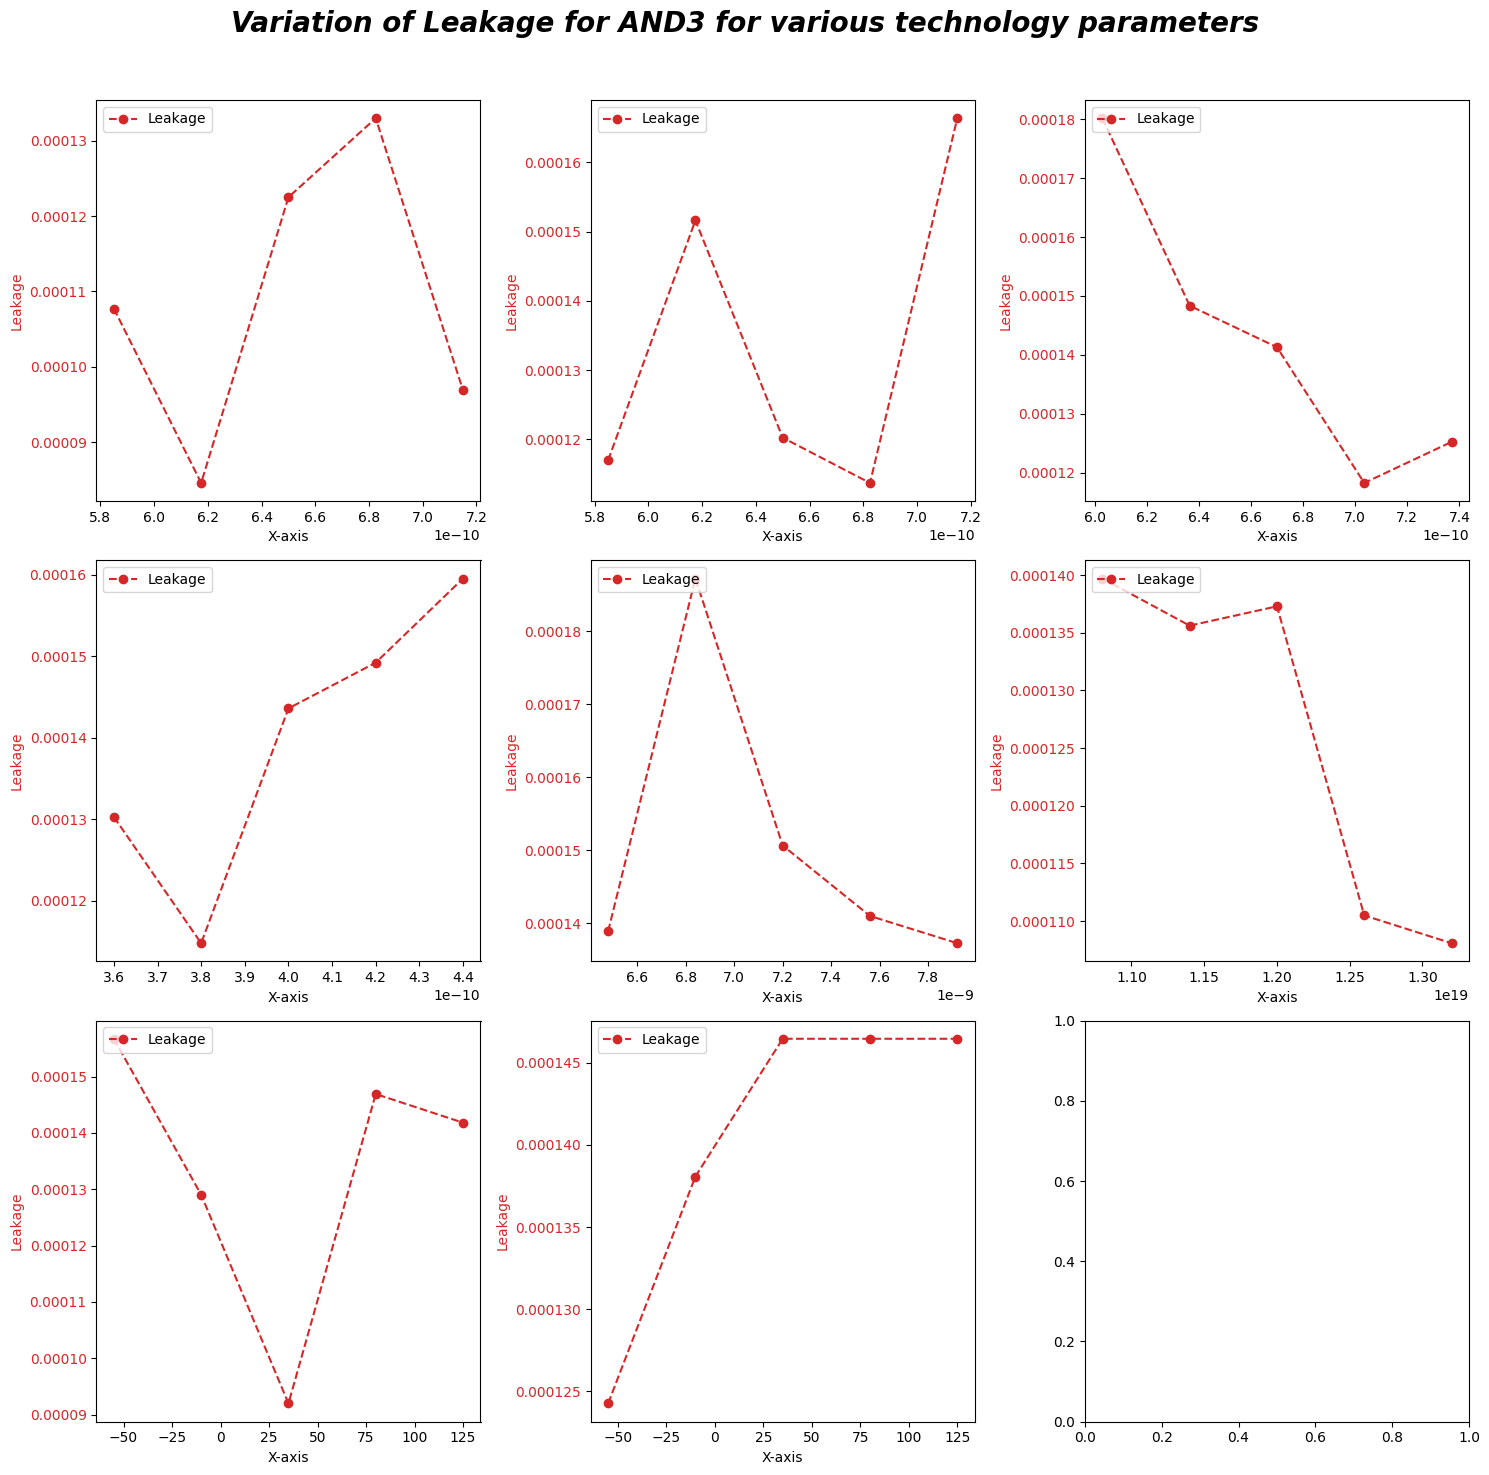

In [62]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()


# 8. NOR

Loading the File path

In [74]:
file_path = "NOR_2_leakage.csv"  # Provide the path to your CSV file
df_xor_leakage = pd.read_csv(file_path)

## 8.1 Temparature

In [75]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_xor_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)


[4.661551200772542e-07, 6.127413493715834e-07, 4.87293917831728e-07, 1.6773639837515437e-06, 2.594821050987809e-06]


## 8.2 Pvdd

In [76]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_xor_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)


[1.1792702549691882e-06, 1.0773248574026165e-06, 1.1076394687039172e-06, 1.1076394687039172e-06, 1.1076394687039172e-06]


## 8.4 toxe

In [77]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_xor_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)


[3.922671249510141e-07, 3.536153495963802e-07, 6.782518781100493e-07, 1.057341611157831e-06, 7.47034032290165e-07]


## 8.5 toxm

In [78]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_xor_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[1.3735875623304691e-06, 8.850233265900223e-07, 9.625984684769048e-07, 4.0611431487971524e-07, 7.351346413145996e-07]


## 8.6 toxref

In [79]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_xor_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[6.931490312033599e-07, 8.80324805377933e-07, 5.265083993606631e-07, 7.84357781106645e-07, 2.1092604249891505e-06]


## 8.7 toxp

In [80]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_xor_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[1.6649946716652802e-06, 5.92132724099007e-07, 2.212344026037832e-06, 5.271242957143192e-07, 1.8332265403009275e-06]


## 8.8 xj

In [81]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_xor_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)


[3.975482354977754e-07, 1.0236551687140372e-06, 7.34363613842709e-07, 6.32721324438302e-07, 1.447429932633447e-06]


## 8.9 ndep

In [82]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_xor_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[1.8518332907875734e-06, 9.174472924743206e-07, 1.1809847667327256e-06, 7.275783482828641e-07, 8.510046582198609e-07]


## 8.10 Plotting all plots

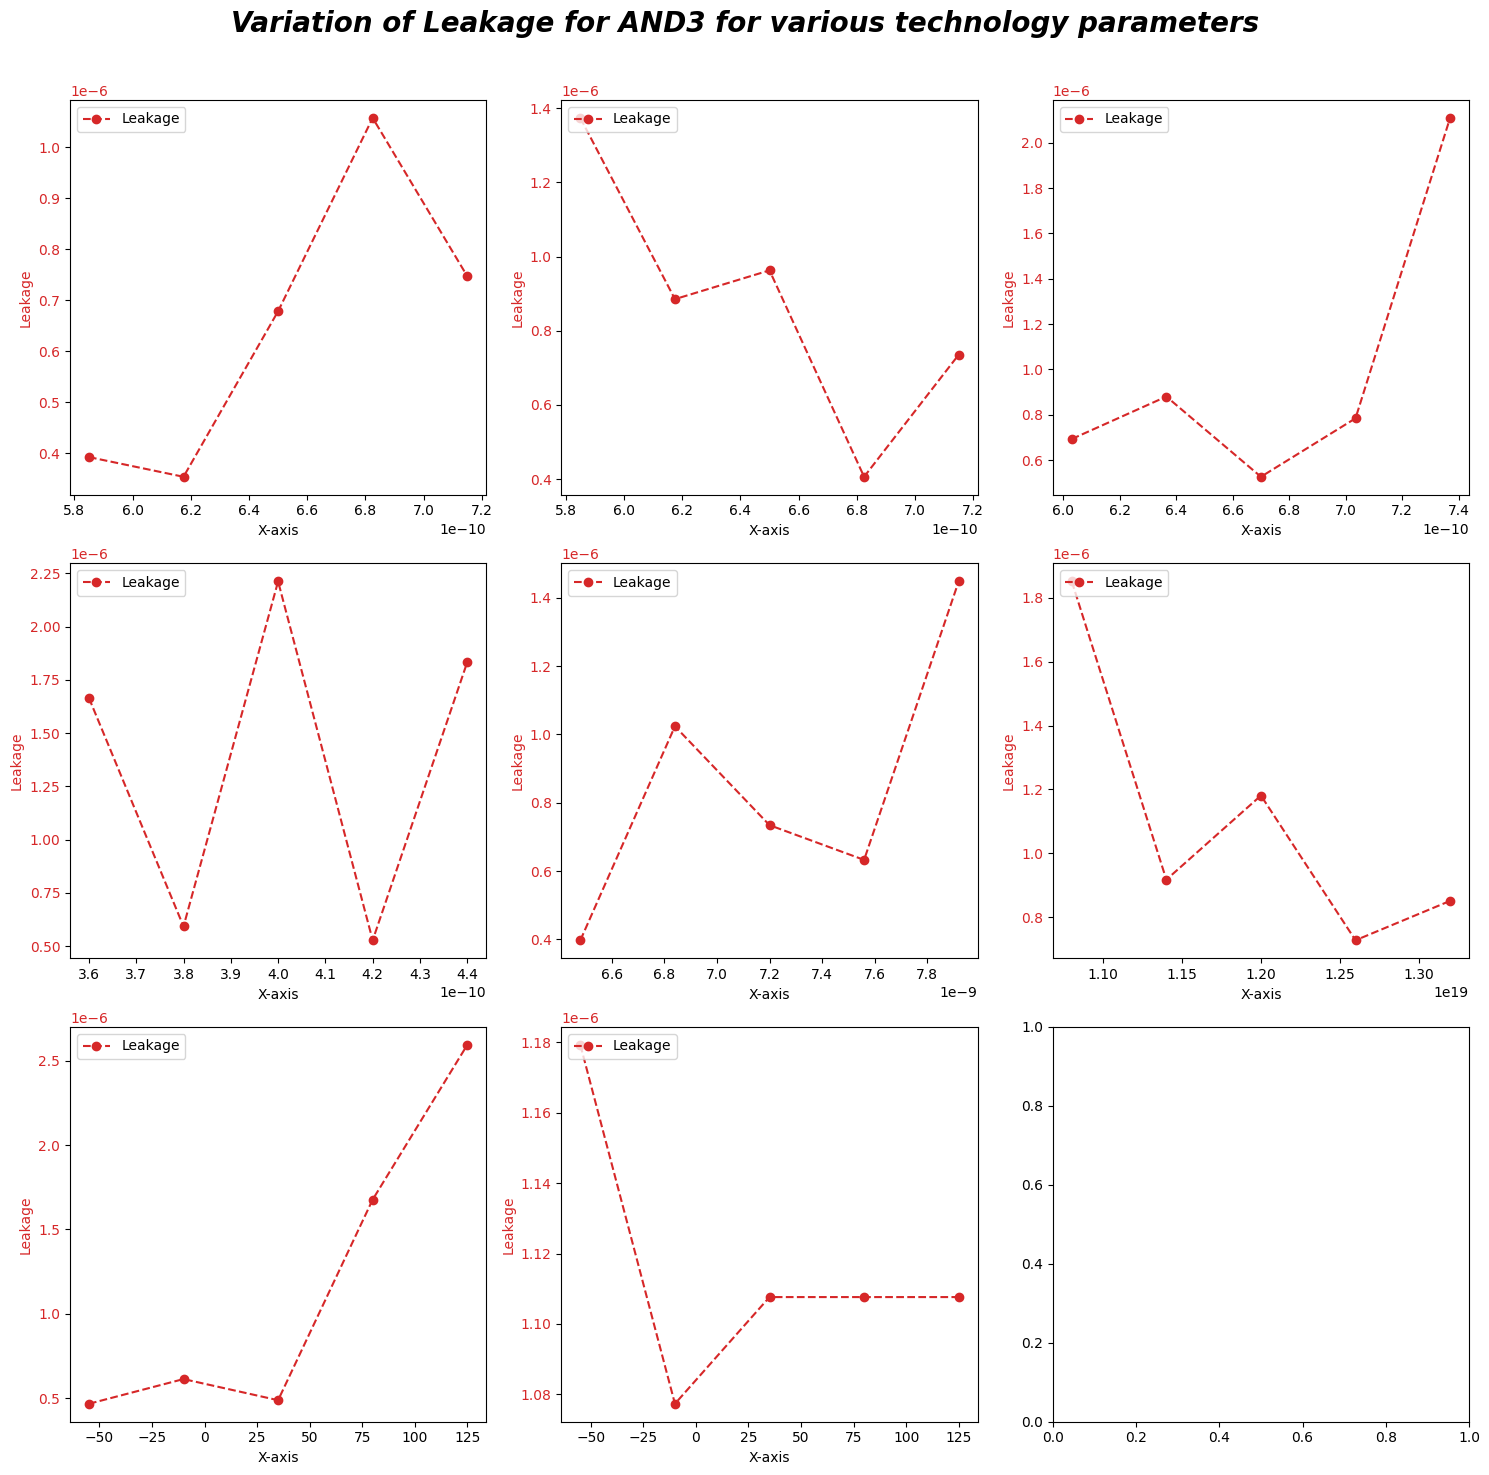

In [83]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for AND3 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()


# 9. NAND_2

Loading the File path

In [84]:
file_path = "NAND_2_leakage.csv"  # Provide the path to your CSV file
df_xor_leakage = pd.read_csv(file_path)

## 9.1 Temparature

In [85]:
## Leakage List
column_name = 'TEMP'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_temp = nearest_values_average(df_xor_leakage, temp_list, column_name,target_column)
print(leakage_list_temp)


[5.875302379560664e-07, 5.881013629065867e-07, 4.990461309003988e-07, 1.2234605654192758e-06, 1.7489228436782655e-06]


## 9.2 Pvdd

In [86]:
## Leakage List
column_name = 'pvdd'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_pvdd = nearest_values_average(df_xor_leakage, pvdd_list, column_name,target_column)
print(leakage_list_pvdd)


[8.92578892275853e-07, 8.806491656664289e-07, 1.142006632700863e-06, 1.142006632700863e-06, 1.142006632700863e-06]


## 9.4 toxe

In [87]:
## Leakage List
column_name = 'toxe_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxe = nearest_values_average(df_xor_leakage, toxe_list, column_name,target_column)
print(leakage_list_toxe)


[4.3354444929688843e-07, 3.5132225611410013e-07, 7.820256169798139e-07, 1.0279582048145085e-06, 5.762906716770585e-07]


## 9.5 toxm

In [88]:
## Leakage List
column_name = 'toxm_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxm = nearest_values_average(df_xor_leakage, toxm_list, column_name,target_column)
print(leakage_list_toxm)


[1.0038745817450102e-06, 9.39726175704313e-07, 6.882728924285923e-07, 5.048716262230666e-07, 7.373700226889659e-07]


## 9.6 toxref

In [89]:
## Leakage List
column_name = 'toxref_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxref = nearest_values_average(df_xor_leakage, toxref_list, column_name,target_column)
print(leakage_list_toxref)


[8.219513715815935e-07, 8.970027299318333e-07, 6.421002468981757e-07, 8.111052054844487e-07, 1.3619206638870152e-06]


## 9.7 toxp

In [90]:
## Leakage List
column_name = 'toxp_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_toxp = nearest_values_average(df_xor_leakage, toxp_par_list, column_name,target_column)
print(leakage_list_toxp)


[1.0889807121334534e-06, 5.626644254878918e-07, 1.44704843998491e-06, 6.797094006656769e-07, 1.2906477430552285e-06]


## 9.8 xj

In [91]:
## Leakage List
column_name = 'xj_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_xj = nearest_values_average(df_xor_leakage, xj_list, column_name,target_column)
print(leakage_list_xj)


[4.7239593603865403e-07, 1.042235564350396e-06, 7.08340296247483e-07, 6.433145015432068e-07, 1.0208954436709963e-06]


## 9.9 ndep

In [92]:
## Leakage List
column_name = 'ndep_n'  # Specify the column name
target_column = 'Leakage_power'
leakage_list_ndep = nearest_values_average(df_xor_leakage, ndep_list, column_name,target_column)
print(leakage_list_ndep)


[1.3263041498940357e-06, 9.168600022021039e-07, 1.0905688679725008e-06, 7.206574745253466e-07, 7.306394994122247e-07]


## 9.10 Plotting all plots

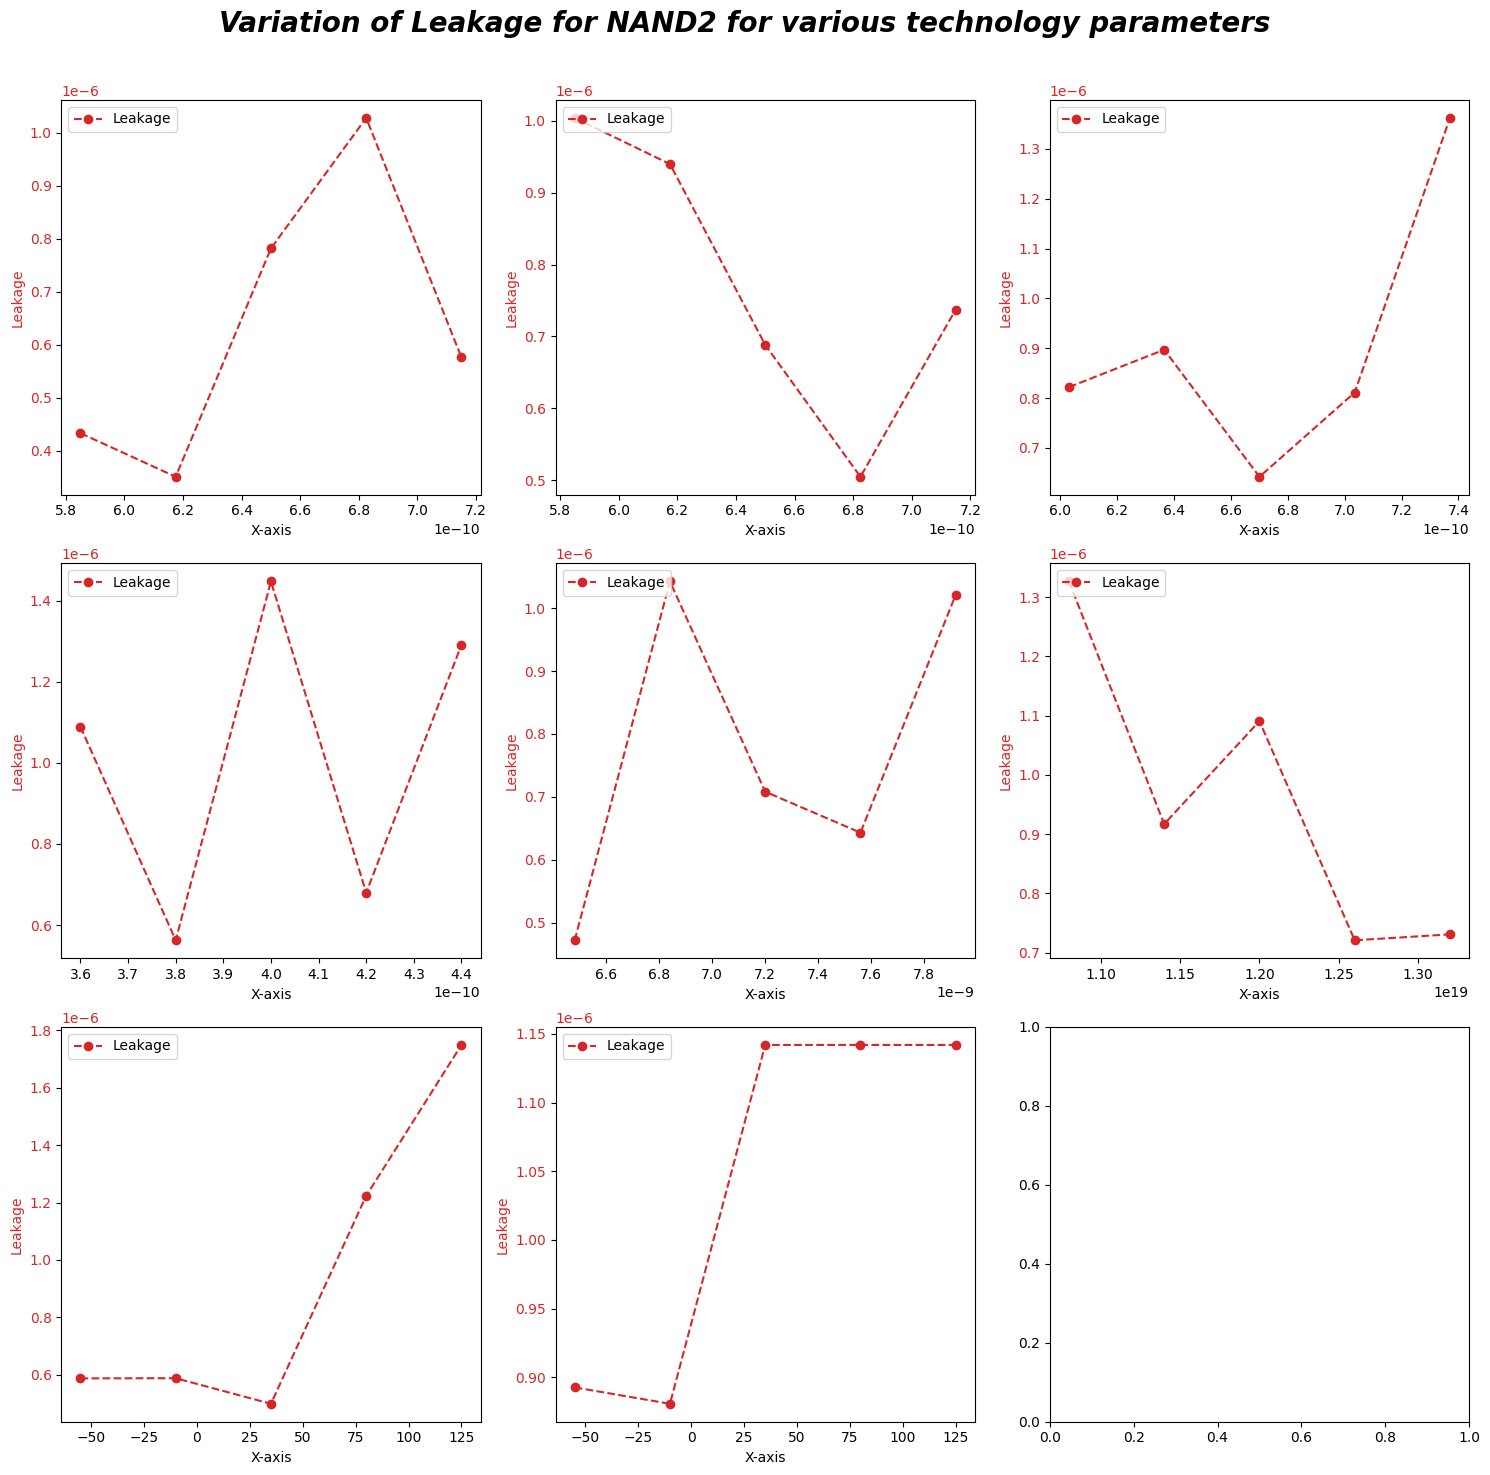

In [93]:
# Create a 3x3 grid of subplots
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

# Data for each subplot
data = [
    (axs[0, 0], toxe_list, 'toxe', 'Toxe', leakage_list_toxe),
    (axs[0, 1], toxm_list, 'toxm', 'Toxm', leakage_list_toxm),
    (axs[0, 2], toxref_list, 'toxref', 'Toxref', leakage_list_toxref),
    (axs[1, 0], toxp_par_list, 'toxp', 'Toxp', leakage_list_toxp),
    (axs[1, 1], xj_list, 'xj', 'Xj', leakage_list_xj),
    (axs[1, 2], ndep_list, 'ndep', 'Ndep', leakage_list_ndep),
    (axs[2, 0], temp_list, 'TEMP', 'Temp', leakage_list_temp),
    (axs[2, 1], temp_list, 'Pvdd', 'Pvdd', leakage_list_pvdd)
]

for ax, x,xlabel, param1, param2 in data:
    plot_leakage(ax, x, param2)

plt.tight_layout()
fig.suptitle('Variation of Leakage for NAND2 for various technology parameters', fontsize=20,fontweight='bold',fontstyle='italic')
plt.subplots_adjust(top=0.92)
plt.show()
